# Gradient Boosting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate synthetic dataset

In [2]:
np.random.seed(2023116)
x = np.random.uniform(0, 1, 100)
noise = np.random.normal(0, 0.01, 100)
y = np.sin(2 * np.pi * x) + np.cos(2 * np.pi * x) + noise

# Split into train (80%) and test (20%)
idx = np.random.permutation(len(x))
train_size = int(0.8 * len(x))
train_idx, test_idx = idx[:train_size], idx[train_size:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

get decision stump

In [3]:
def decision_stump(x, neg_grad):
    best_cut = None
    best_val = None
    best_loss = float('inf')
    
    for cut_value in np.linspace(0, 1, 20):
        left_mask = x <= cut_value
        right_mask = x > cut_value

        if left_mask.sum() == 0 or right_mask.sum() == 0:
            continue

        left_val = np.mean(neg_grad[left_mask])
        right_val = np.mean(neg_grad[right_mask])

        pred = np.where(x <= cut_value, left_val, right_val)
        loss = np.mean((neg_grad - pred) ** 2)

        if loss < best_loss:
            best_loss = loss
            best_cut = cut_value
            best_val = (left_val, right_val)

    return best_cut, best_val

def predict_stump(x, cut_value, values):
    left_val, right_val = values
    return np.where(x <= cut_value, left_val, right_val)

Gradient Boosting Function

In [4]:
def gradient_boost(x_train, y_train, x_test, y_test, loss_type='squared', iterations=200, lr=0.01):
    train_preds = np.zeros_like(y_train)
    test_preds = np.zeros_like(y_test)
    
    train_loss = []
    train_preds_over_time = []
    test_preds_over_time = []

    for i in range(iterations):
        if loss_type == 'squared':
            neg_grad = y_train - train_preds
        elif loss_type == 'absolute':
            neg_grad = np.sign(y_train - train_preds)
        else:
            raise ValueError("Unsupported loss")

        cut_value, values = decision_stump(x_train, neg_grad)
        pred_train = predict_stump(x_train, cut_value, values)
        pred_test = predict_stump(x_test, cut_value, values)

        train_preds += lr * pred_train
        test_preds += lr * pred_test

        train_preds_over_time.append(train_preds.copy())
        test_preds_over_time.append(test_preds.copy())

        if loss_type == 'squared':
            loss = np.mean((y_train - train_preds) ** 2)
        else:
            loss = np.mean(np.abs(y_train - train_preds))
        train_loss.append(loss)

    return train_preds_over_time, test_preds_over_time, train_loss

Run for both loss types

In [5]:
iterations = 200
train_preds_sq, test_preds_sq, loss_sq = gradient_boost(x_train, y_train, x_test, y_test, 'squared', iterations)
train_preds_abs, test_preds_abs, loss_abs = gradient_boost(x_train, y_train, x_test, y_test, 'absolute', iterations)


# Plotting

In [6]:
iters_to_plot = [10, 100, 200]

Train Predictions

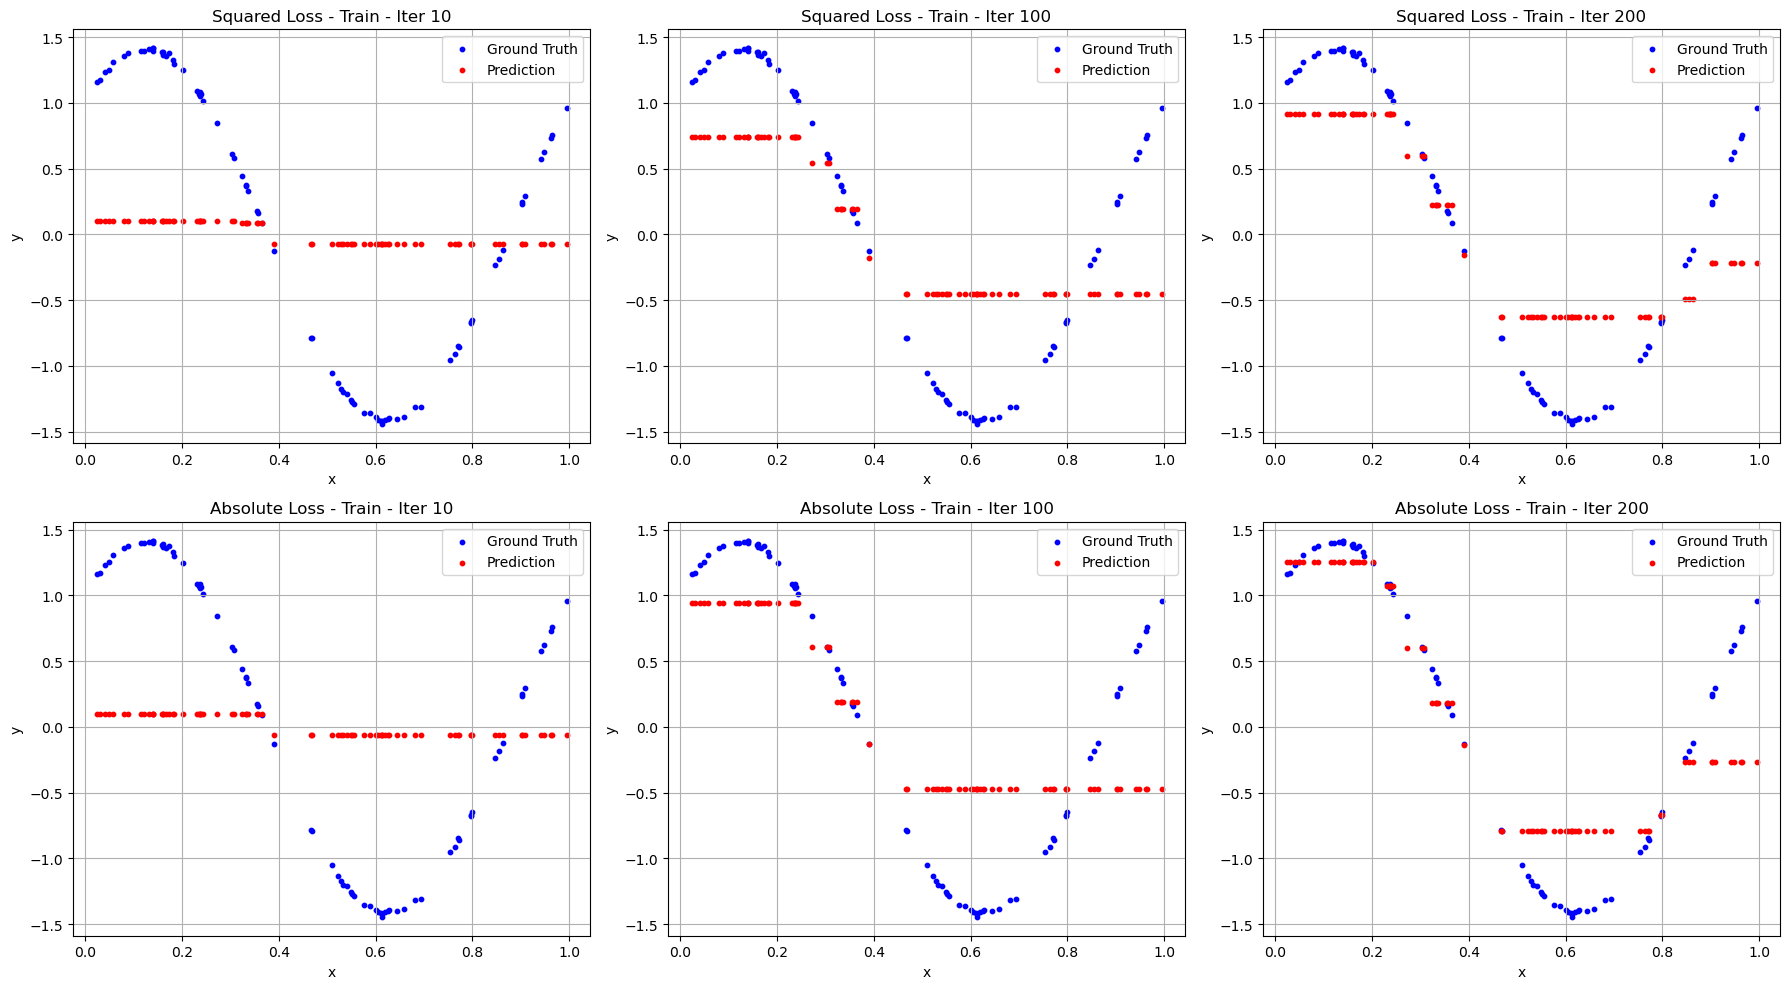

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, t in enumerate(iters_to_plot):
    # Squared Loss - Train
    axes[0, idx].scatter(x_train, y_train, color='blue', s=10, label='Ground Truth')
    axes[0, idx].scatter(x_train, train_preds_sq[t-1], color='red', s=10, label='Prediction')
    axes[0, idx].set_title(f'Squared Loss - Train - Iter {t}')
    axes[0, idx].set_xlabel('x')
    axes[0, idx].set_ylabel('y')
    axes[0, idx].legend()
    axes[0, idx].grid()

    # Absolute Loss - Train
    axes[1, idx].scatter(x_train, y_train, color='blue', s=10, label='Ground Truth')
    axes[1, idx].scatter(x_train, train_preds_abs[t-1], color='red', s=10, label='Prediction')
    axes[1, idx].set_title(f'Absolute Loss - Train - Iter {t}')
    axes[1, idx].set_xlabel('x')
    axes[1, idx].set_ylabel('y')
    axes[1, idx].legend()
    axes[1, idx].grid()

plt.tight_layout()
plt.show()

Test Predictions

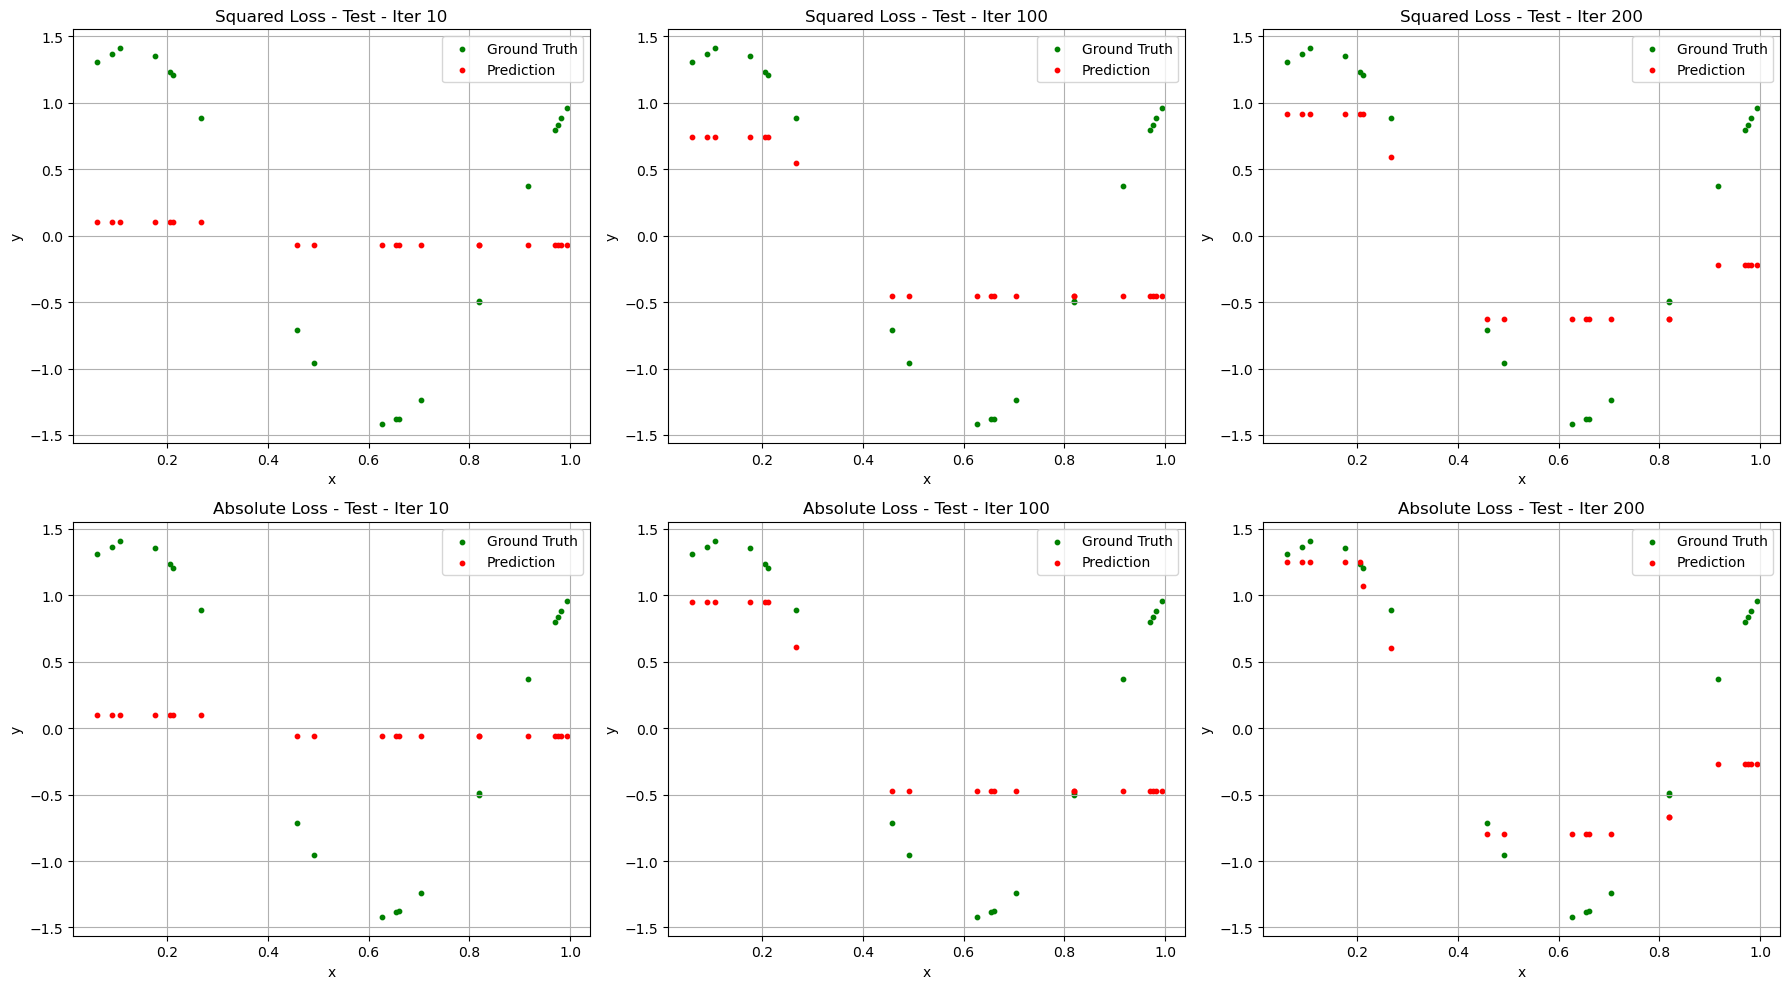

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, t in enumerate(iters_to_plot):
    # Squared Loss - Test
    axes[0, idx].scatter(x_test, y_test, color='green', s=10, label='Ground Truth')
    axes[0, idx].scatter(x_test, test_preds_sq[t-1], color='red', s=10, label='Prediction')
    axes[0, idx].set_title(f'Squared Loss - Test - Iter {t}')
    axes[0, idx].set_xlabel('x')
    axes[0, idx].set_ylabel('y')
    axes[0, idx].legend()
    axes[0, idx].grid()

    # Absolute Loss - Test
    axes[1, idx].scatter(x_test, y_test, color='green', s=10, label='Ground Truth')
    axes[1, idx].scatter(x_test, test_preds_abs[t-1], color='red', s=10, label='Prediction')
    axes[1, idx].set_title(f'Absolute Loss - Test - Iter {t}')
    axes[1, idx].set_xlabel('x')
    axes[1, idx].set_ylabel('y')
    axes[1, idx].legend()
    axes[1, idx].grid()

plt.tight_layout()
plt.show()


Loss Curves

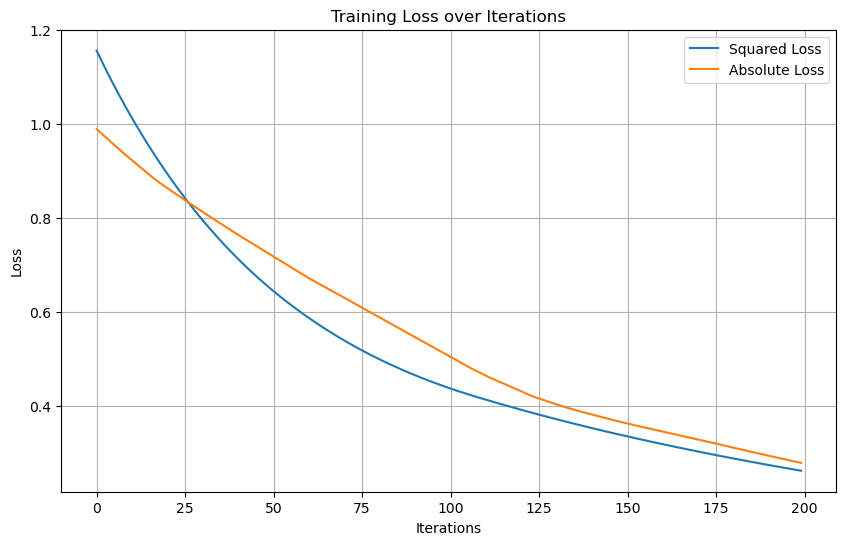

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(loss_sq, label='Squared Loss')
plt.plot(loss_abs, label='Absolute Loss')
plt.title('Training Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()